<h1 align="center">Aprendizagem por Reforço para as Séries Temporais</h1>
<p align='center'><img src = https://datapeaker.com/wp-content/uploads/2021/09/496302-1548589.jpg></p>
<p align='justify'>A Aprendizagem por Reforço é um paradigma amplamente bem sucedido para problemas de controle e optimização da função que não requer dados rotulados. É uma estrutura poderosa para uma aprendizagem autónoma orientada pela experiência, em que um agente interage diretamente com o ambiente através de ações e melhora a sua eficiência por tentativa e erro.</p>

<p align='justify'>A Aprendizagem por Reforço é um dos principais paradigmas na aprendizagem de máquina no que se refere aos métodos supervisionados e não supervisionados. Uma distinção importante é que os métodos supervisionados ou os métodos não supervisionados são passivos, respondendo apenas às mudanças, enquanto que na Aprendizagem por Reforço é ativa, no sentido de mudar o ambiente e procurar novos dados. Na realidade, a partir da perpectiva da Aprendizagem de Máquina, os algoritmos de aprendizagem de reforço podem ser vistos como alternados entre encontrar bons dados e fazer uma aprendizagem supervisionada sobre esses dados.</p>
<p align="justify">Na Aprendizagem por Reforço, um agente interage com o ambiente através das ações e recebe <i>feedback</i> sob a forma de recompensas. Ao contrário do que acontece na aprendizagem supervisionado, não há dados rotulados disponíveis, mas sim, o ambiente é que explorado com base na expectativa de recompensas cumulativas.</p>

<p align="justify">Conceitualmente, a aprendizagem por reforço é uma abordagem em que um agente interage diretamente com o ambiente através de ações. O agente aprende através de tentativa e erro para maximizar a recompensa.</p>

<h2><i>Bandit Algorithms</i></h2>
<p align='justify'>O <i>Multi-Armed Bandit</i> (MAB) é um problema clássico de aprendizagem por reforço, em que um jogador é confrontado com um <i>slot machine</i> (bandido) que tem alavancas k (braços), cada com uma distribuição de recompensas diferente. O objectivo do agente é maximizar a sua distribuição cumulativa de recompensa com base em julgamentos. O <i>Bandit learning</i> refere-se a algoritmos que tem como objetivo optimizar uma função objetiva estacionário desconhecida.</p>

<h2><i>Deep Q-Learning</i></h2>
<p align='justify'>O <i>Q-Learning</i> é um algoritmo para aprender o valor de uma ação num determinado estado. O <i>Q-learning</i> gira em torno da representação do recompensa esperada por uma ação tomada num determinado estado.</p>

<h2>Aplicações</h2>

<h3>Recomendações</h3>

In [1]:
# Importando as Bibliotecas
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from mab_ranking.bandits.rank_bandits import IndependentBandits
from mab_ranking.bandits.bandits import DirichletThompsonSampling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Carregando os dados

url = "https://raw.githubusercontent.com/benman1/Machine-Learning-for-Time-Series-with-Python/main/chapter11/jesterfinal151cols.csv"
jester_data = pd.read_csv(url, header=None)
jester_data.index.name = 'users'
for col in jester_data.columns:
    jester_data[col] = jester_data[col].apply(lambda x: 0.0 if x>=99 or x<7.0 else 1.0)
jester_data = jester_data[jester_data.sum(axis=1) > 0]
jester_data

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
users,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Escolhemos bandits com amostras Thompson da Beta Distribution e recomendamos as melhores 10 piadas. 
independent_bandits = IndependentBandits(
    num_arms = jester_data.shape[1],
    num_ranks = 10,
    bandit_class = DirichletThompsonSampling
)

# Começar a simulação. O nosso caso hipotético website tem muitas visitas e receberemos o feedback sobre as 10 piadas que mostraremos como escolhidas.
num_steps = 7000
hit_rates = []
for _ in trange(1, num_steps + 1):
    selected_items = set(independent_bandits.choose())
    # Escolher um usuário de forma aleatória
    random_user = jester_data.sample().iloc[0, :]
    ground_truth = set(random_user[random_user == 1].index)
    hit_rate = len(ground_truth.intersection(selected_items)) / len(ground_truth)
    feedback_list = [1.0 if item in ground_truth else 0.0 for item in selected_items]
    independent_bandits.update(selected_items, feedback_list)
    hit_rates.append(hit_rate)

100%|██████████| 7000/7000 [00:47<00:00, 146.62it/s]


<p align="justify">Nós simulamos 7.000 interações (visitas). A cada visita, mudaremos nossas escolhas de acordo com as expectativas de recompensas atualizadas.</p>

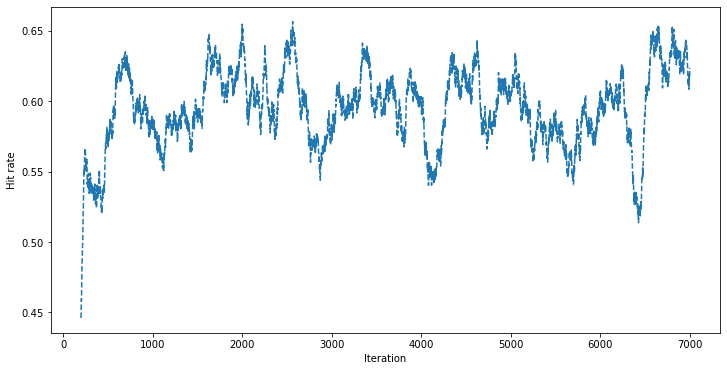

In [4]:
# Vamos plotar a taxa de acerto, as piadas que os utilizadoes estão selecioando.
stats = pd.Series(hit_rates)
plt.figure(figsize=(12, 6))
plt.plot(stats.index, stats.rolling(200).mean(), "--")
plt.xlabel('Iteration')
plt.ylabel('Hit rate')
plt.show()

# Foi introduzida uma média móvel (mais de 200 interações) para obter um gráfico mais suave!

<p align="justify">A biblioteca <i>mab-ranking</i> suporta a informação contextual, então podemos experimentar fornecendo uma informação adicional. Vamos imaginar esta informação como diferentes grupos de usuários (<i>cohorts</i>). Nós poderíamos pensar em usuários que utilizam diferentes funcionalidades de pesquisa ou filtros no nosso site imaginário, como por exemplo "piadas mais recentes" ou "mais populares". De forma alternativa, poderiam ser de regiões diferentes. Ou pode ser uma categoria de <i>timestamp</i> que corresponde à hora do dia das visitas dos usuários ao nosso site.</p>

In [5]:
# Vamos agrupar ps utilizadores pelas suas preferências e utilizaremos os clusters.

scaler = StandardScaler().fit(jester_data)
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaler.transform(jester_data)) # Criamos 5 grupos de usuários.
contexts = pd.Series(kmeans.labels_, index=jester_data.index)

# Vamos resetar nosso bandits
independent_bandits = IndependentBandits(
num_arms=jester_data.shape[1],
num_ranks=10,
bandit_class=DirichletThompsonSampling
)

# Vamos gerar a simulação de novo!!
hit_rates = []
for _ in trange(1, num_steps + 1):
    selected_items = set(independent_bandits.choose())
    # Escolher um usuário de forma aleatória
    random_user = jester_data.sample().iloc[0, :]
    ground_truth = set(random_user[random_user == 1].index)
    hit_rate = len(ground_truth.intersection(selected_items)) / len(ground_truth)
    feedback_list = [1.0 if item in ground_truth else 0.0 for item in selected_items]
    independent_bandits.update(selected_items, feedback_list)
    hit_rates.append(hit_rate)

100%|██████████| 7000/7000 [00:46<00:00, 149.44it/s]


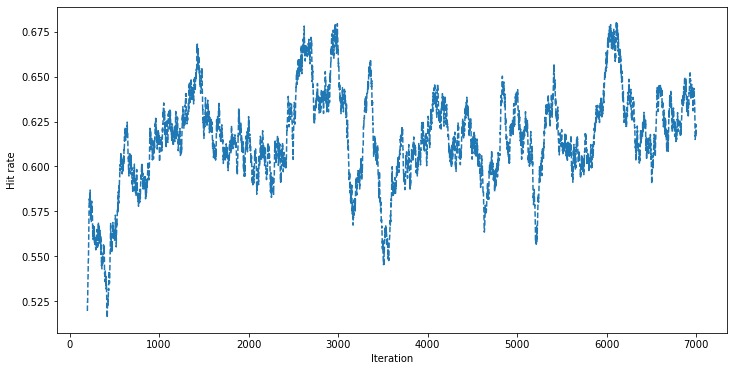

In [6]:
# Plotando novamente!!
stats = pd.Series(hit_rates)
plt.figure(figsize=(12, 6))
plt.plot(stats.index, stats.rolling(200).mean(), "--")
plt.xlabel('Iteration')
plt.ylabel('Hit rate')

plt.show()

<p align="justify">Podemos ver que a taxa de sucesso é um pouco mais elevada do que anteriormente. Este modelo ignora a ordem das anedotas recomendadas no nosso hipotético website. Existem outras implementações <i>bandits</i> que modelam as fileiras. Um exercício divertido é criar um modelo probabilístico de expectativas de recompensa.</p>

<h4>Negociações com DQN</h4>
<p align="justify">Este tutorial é baseado na biblioteca do <i>TensorTrade</i> que utilizaremos neste exemplo.O <i>TensorTrade</i> é uma estrutura para a construção, formação, avaliação e implementação de algoritmos de <i>trading</i> robustos utilizando a aprendizagem por reforço.</p>

In [7]:
# Importando as Bibliotecas
import pandas as pd
import tensortrade.env.default as default

from tensortrade.data.cdd import CryptoDataDownload
from tensortrade.feed.core import Stream, DataFeed
from tensortrade.oms.exchanges import Exchange
from tensortrade.oms.services.execution.simulated import execute_order
from tensortrade.oms.instruments import USD, BTC, ETH
from tensortrade.oms.wallets import Wallet, Portfolio
from tensortrade.agents import DQNAgent

<p align='justify'>Estas importações referem-se a serviços de utilidade pública para a troca (simulada), o portifólio e o ambiente. Além disso, existem utilitários para o carregamento e alimentação dos dados na simulação, constantes para a conversão de moeda, e finalmente, há um <i>deep Q-agent</i>, que consiste de uma <i>Deep Q-Network</i>(DQN).</p>

In [8]:
# Carregando o histórico dos preços de Criptomoedas.

cdd = CryptoDataDownload()
data = cdd.fetch('Bitstamp', 'USD', 'BTC', '1h')
data.head()

,date,unix,open,high,low,close,volume
0,2018-05-15 06:00:00,1526364000,8733.86,8796.68,8707.28,8740.99,559.93
1,2018-05-15 07:00:00,1526367600,8740.99,8766.00,8721.11,8739.00,273.58
2,2018-05-15 08:00:00,1526371200,8739.00,8750.27,8660.53,8728.49,917.79
3,2018-05-15 09:00:00,1526374800,8728.49,8754.40,8701.35,8708.32,182.62
4,2018-05-15 10:00:00,1526378400,8708.32,8865.00,8695.11,8795.90,1260.69


In [9]:
# Criando indicadores
def rsi(price: Stream[float], period: float) -> Stream[float]:
    r = price.diff()
    upside = r.clamp_min(0).abs()
    downside = r.clamp_max(0).abs()
    rs = upside.ewm(alpha=1 / period).mean() / downside.ewm(alpha=1 / period).mean()
    return 100*(1 - (1 + rs) ** -1)


def macd(price: Stream[float], fast: float, slow: float, signal: float) -> Stream[float]:
    fm = price.ewm(span=fast, adjust=False).mean()
    sm = price.ewm(span=slow, adjust=False).mean()
    md = fm - sm
    signal = md - md.ewm(span=signal, adjust=False).mean()
    return signal## Create features with the feed module

# Escolhendo o fechamento dos preços
features = []
for c in data.columns[1:]:
    s = Stream.source(list(data[c]), dtype="float").rename(data[c].name)
    features += [s]

cp = Stream.select(features, lambda s: s.name == "close")

# Adicionando 3 características (Indicador de Tendência, RSI, MACD):
features = [
    cp.log().diff().rename("lr"),
    rsi(cp, period=20).rename("rsi"),
    macd(cp, fast=10, slow=50, signal=5).rename("macd")
]

feed = DataFeed(features)
feed.compile()

In [10]:
for i in range(5):
    print(feed.next())

{'lr': nan, 'rsi': nan, 'macd': 0.0}
{'lr': -0.00022768891842694927, 'rsi': 0.0, 'macd': -0.1891859774210995}
{'lr': -0.0012033785355889393, 'rsi': 0.0, 'macd': -1.2726616061000744}
{'lr': -0.0023134975946028646, 'rsi': 0.0, 'macd': -3.6577343503541435}
{'lr': 0.01000681330867259, 'rsi': 74.26253567956897, 'macd': 3.7087743627464844}


<p align="justify">A <i>Exchange</i> é a interface que nos permitirá executar as ordens. Uma <i>exchange</i> necessita de um nome, um serviço de execução, e um fluxos de dados de preços. Atualmente, o <i>TensorTrade</i> suporta um serviço de execução simulada utilizando dados simulados ou estocásticos.</p>

In [11]:
# Criando um borker e um Portifólio
bitstamp = Exchange("bitstamp", service=execute_order)(
    Stream.source(list(data["close"]), dtype="float").rename("USD-BTC")
)

portfolio = Portfolio(USD, [
    Wallet(bitstamp, 10000 * USD),
    Wallet(bitstamp, 10 * BTC)
])

<p align="justify"> Um portofólio pode ser qualquer combinação de trocas e instrumentos que a troca suporte.</p>

In [12]:
# Renderizar:
renderer_feed = DataFeed([
    Stream.source(list(data["date"])).rename("date"),
    Stream.source(list(data["open"]), dtype="float").rename("open"),
    Stream.source(list(data["high"]), dtype="float").rename("high"),
    Stream.source(list(data["low"]), dtype="float").rename("low"),
    Stream.source(list(data["close"]), dtype="float").rename("close"), 
    Stream.source(list(data["volume"]), dtype="float").rename("volume") 
])

# O Ambiente de Trading:
env = default.create(
    portfolio=portfolio,
    action_scheme="managed-risk",
    reward_scheme="risk-adjusted",
    feed=feed,
    renderer_feed=renderer_feed,
    renderer=default.renderers.PlotlyTradingChart(),
    window_size=20
)

env.observer.feed.next()

{'internal': {'bitstamp:/USD-BTC': 8740.99,
  'bitstamp:/USD:/free': 10000.0,
  'bitstamp:/USD:/locked': 0.0,
  'bitstamp:/USD:/total': 10000.0,
  'bitstamp:/BTC:/free': 10.0,
  'bitstamp:/BTC:/locked': 0.0,
  'bitstamp:/BTC:/total': 10.0,
  'bitstamp:/BTC:/worth': 87409.9,
  'net_worth': 97409.9},
 'external': {'lr': nan, 'rsi': nan, 'macd': 0.0},
 'renderer': {'date': Timestamp('2018-05-15 06:00:00'),
  'open': 8733.86,
  'high': 8796.68,
  'low': 8707.28,
  'close': 8740.99,
  'volume': 559.93}}

In [13]:
# Treinando um  DQN trading agent
agent = DQNAgent(env)

agent.train(n_steps=200, n_episodes=2, save_path="agents/")

C:\Users\willi\AppData\Local\Temp\ipykernel_18436\1864819480.py:2: DeprecationWarning: Call to deprecated class DQNAgent. (Builtin agents are being deprecated in favor of external implementations (ie: Ray)) -- Deprecated since version 1.0.4.
  agent = DQNAgent(env)
C:\Users\willi\anaconda3\lib\site-packages\deprecated\classic.py:173: DeprecationWarning: Call to deprecated class Agent. (Builtin agents are being deprecated in favor of external implementations (ie: Ray)) -- Deprecated since version 1.0.4.
  return old_new1(cls, *args, **kwargs)
C:\Users\willi\anaconda3\lib\site-packages\tensortrade\agents\dqn_agent.py:304: DeprecationWarning: Call to deprecated class ReplayMemory. (Builtin agents are being deprecated in favor of external implementations (ie: Ray)) -- Deprecated since version 1.0.4.
  memory = ReplayMemory(memory_capacity, transition_type=DQNTransition)


====      AGENT ID: 46e73c33-4fe0-4d6c-8619-64ad57ccade4      ====


FigureWidget({
    'data': [{'name': 'Price',
              'showlegend': False,
              'type': 'candle…

FigureWidget({
    'data': [{'close': array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 , 8760.  , 8760.  , 87…

FigureWidget({
    'data': [{'close': array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 , 8760.  , 8760.  , 87…

FigureWidget({
    'data': [{'close': array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 , 8760.  , 8760.  , 87…

FigureWidget({
    'data': [{'close': array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 , 8760.  , 8760.  , 87…

FigureWidget({
    'data': [{'close': array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 , 8760.  , 8760.  , 87…

FigureWidget({
    'data': [{'close': array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 , 8760.  , 8760.  , 87…

FigureWidget({
    'data': [{'close': array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 , 8760.  , 8760.  , 87…

FigureWidget({
    'data': [{'close': array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 , 8760.  , 8760.  , 87…

FigureWidget({
    'data': [{'close': array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 , 8760.  , 8760.  , 87…

-1302247.9461273197

<p align="justify">Estes gráficos nos dão uma visão geral das operações de mercado do nosso <i>Tranding bot</i>. O primeiro <i>subplot</i> nos mostra os movimentos de subida e descida dos preços. Depois, a segunda subparcela apresenta os volumes de <i>stock</i> na carteira, e no <i>subplot</i> mais inferior, pode ver o património líquido da carteira.</p>
<p align="justify">Se quisermos ver o património líquido ao longo do tempo (não apenas o primeiro instantâneo como acima) basta plotar:</p>

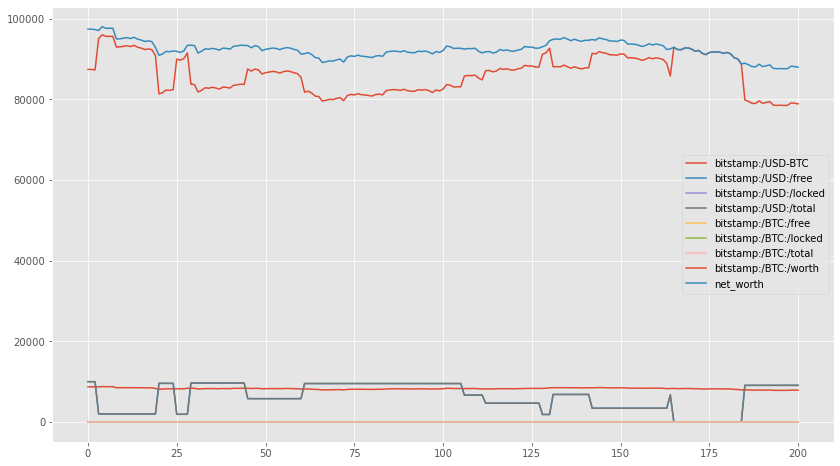

In [22]:
performance = pd.DataFrame.from_dict(env.action_scheme.portfolio.performance, orient='index')
performance.plot(figsize=(14,8))
plt.show()

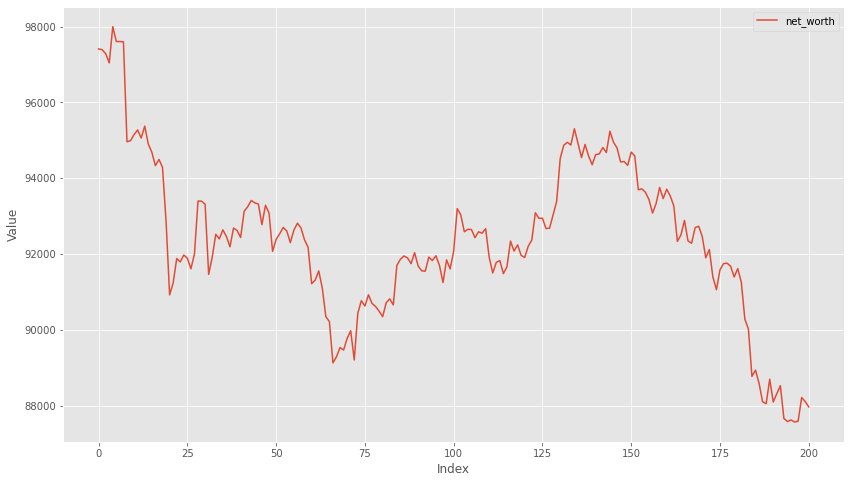

In [26]:
performance['net_worth'].plot(figsize=(14,8))
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()